In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
import numpy as np

In [4]:
data = pd.read_pickle("datacovid.bz2", compression="bz2")

In [5]:
df = data["id"].groupby(data["datum"]).count()

In [6]:
df.head(200)

datum
2020-03-01       6
2020-03-03       4
2020-03-04       2
2020-03-05       6
2020-03-06      22
              ... 
2020-09-13    1582
2020-09-14    2056
2020-09-15    3352
2020-09-16    4266
2020-09-17    6250
Name: id, Length: 200, dtype: int64

In [7]:
#root mean squared error 
def rmse(true_val, pred_val):
    squared_error = 0
    if len(true_val) == len(pred_val):
        for idx in range(len(true_val)):
            squared_error += (true_val[idx] - pred_val[idx])**2
    mse  = squared_error / len(true_val)
    rmse = mse**(1/2)
    return rmse

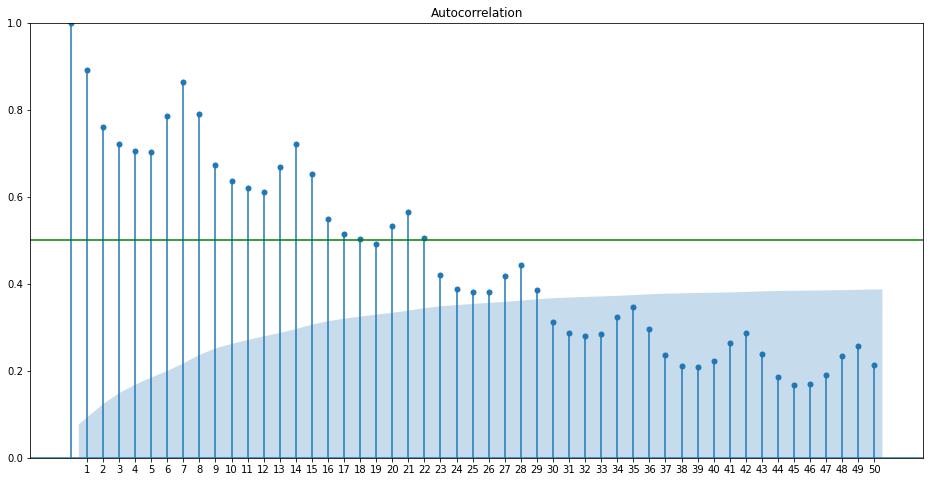

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(df, lags=50, ax=ax)
plt.axhline(y=0.5, color="green")
plt.xticks(np.arange(1, 51, 1))
plt.ylim([0,1]) # we know there is only a positive correlation
plt.show()

# 17 lags above 0.5 

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

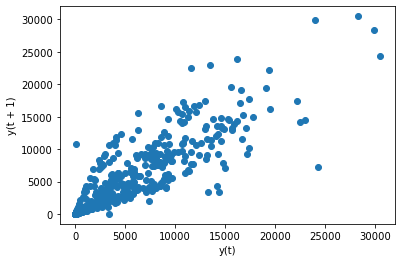

In [9]:
lag_plot(df)
# obvious relationship

In [14]:
# spliting dataframe to test and train
df_train = df.iloc[:-10]
df_test = df.iloc[-10:]

In [15]:
# fitting model and predicting
model = AutoReg(df_train.values, lags=17, old_names = False).fit()
forecasts = model.forecast(10).tolist()
test_values = df_test.tolist()

In [16]:
rmse(test_values, forecasts)

6478.932924137845

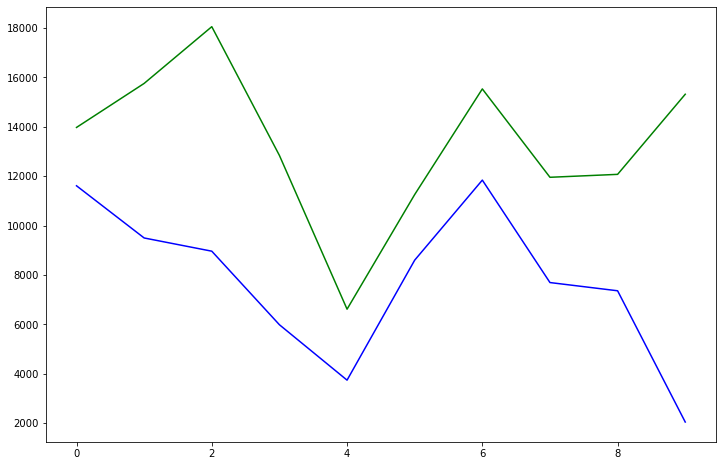

In [17]:
fig = plt.subplots(figsize=(12,8))
# predicted values - green
plt.plot(forecasts, color="green")
# true values - blue
plt.plot(test_values,color="blue")
plt.show()